In [1]:
import mysql.connector
import pandas as pd

# 데이터베이스 연결 설정
config = {
  'user': 'root',
  'password': '00000000',
  'host': 'localhost',
  'database': 'ZeroBase',
  'raise_on_warnings': True
}

# 연결 생성
connection = mysql.connector.connect(**config)

# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''select count(*)
                  from (
                        select customer_unique_id, count(customer_unique_id) as customer_count
                        from olist_customers_dataset
                        group by customer_unique_id
                        having count(customer_unique_id) > 1
                        order by count(customer_unique_id)
                  ) a
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

# 커서 및 연결 닫기
cursor.close()
# connection.close()


(2997,)


True

* 고객 중 2번 이상 구매한 고객은 2,997명이다.

In [2]:
# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''select count(*)
                  from olist_customers_dataset a
                  where a.customer_id not in (
                    select b.customer_id
                    from olist_orders_dataset b
                  )
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

# 커서 및 연결 닫기
cursor.close()

(0,)


True

* 고객 테이블 고객id와 주문 테이블 고객id가 1:1 대응이다. 즉, 미사용 고객은 없다.

In [3]:
# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''select
                    b.customer_unique_id,
                    a.customer_id,
                    a.order_id,
                    a.order_status,
                    a.order_purchase_timestamp,
                    a.order_approved_at,
                    a.order_delivered_carrier_date,
                    a.order_delivered_customer_date,
                    a.order_estimated_delivery_date
                  from olist_orders_dataset a
                  left join olist_customers_dataset b
                  on a.customer_id = b.customer_id
                  group by b.customer_unique_id, a.customer_id, a.order_id, a.order_status, a.order_purchase_timestamp, a.order_approved_at, a.order_delivered_carrier_date, a.order_delivered_customer_date, a.order_estimated_delivery_date
                  order by b.customer_unique_id
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 결과를 데이터프레임으로 저장
df_one_on_one = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_one_on_one

,customer_unique_id,customer_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0000366f3b9a7992bf8c76cfdf3221e2,fadbb3709178fc513abc1b2670aa1ad2,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,2018-05-21 00:00:00
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4cb282e167ae9234755102258dd52ee8,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,2018-05-10 18:02:42,2018-05-15 00:00:00
2,0000f46a3911fa3c0805444483337064,9b3932a6253894a02c1df9d19004239f,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,2017-04-05 14:38:47,2017-04-07 00:00:00
3,0000f6ccb0745a6a4b88665a16c9f078,914991f0c02ef0843c0e7010c819d642,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,2017-11-01 21:23:05,2017-11-13 00:00:00
4,0004aac84e0df4da2b147fca70cf8255,47227568b10f5f58a524a75507e6992c,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,2017-11-27 23:08:56,2017-12-05 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,fffcf5a5ff07b0908bd4e2dbc735a684,74be082247cd677a147d83ee670e9d53,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,2017-07-06 09:22:00,2017-08-02 00:00:00
99437,fffea47cd6d3cc0a88bd621562a9d061,0ecf8e0a08148af0bf313184f167670a,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,2018-01-09 22:28:20,2018-01-12 00:00:00
99438,ffff371b4d645b6ecea244b27531430a,27f584b0f1dc4e610065c240f68b6be0,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,2017-02-22 12:45:04,2017-03-24 00:00:00
99439,ffff5962728ec6157033ef9805bacc48,832a3b0254347d409512ae92eaf154a6,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,2018-05-14 11:54:26,2018-05-28 00:00:00


* 고객이 주문 할 때 customer_id가 생기고, 이는 order_id와 결합된다.
* 즉, 한 건의 주문(order_id)가 생성되면, customer_id가 하나 생성된다.

In [4]:
# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''select distinct customer_unique_id
                  from olist_customers_dataset
                  where customer_unique_id not in (
                    select distinct e.customer_unique_id
                    from olist_customers_dataset e
                    left join olist_orders_dataset f
                    on e.customer_id = f.customer_id
                    where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
                  )
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 휴면고객 고유id 명단
# 고유id로 뽑은 이유: 한 사람이 두 건 이상 주문했을 시 customer_id는 새로 생성되기 때문에 고유id로 개인이 몇 번 주문했는지 알 수 있다.
df_sleep_customer_unique_id = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_sleep_customer_unique_id

,customer_unique_id
0,861eff4711a542e4b93843c6dd7febb0
1,4c93744516667ad3b8f1fb645a3116a4
2,57b2a98a409812fe9618067b6b8ebe4f
3,2a7745e1ed516b289ed9b29c7d0539a5
4,918dc87cd72cd9f6ed4bd442ed785235
...,...
43342,277490f0d435b602fe4475d4b89e9181
43343,e7f8760e2bbd2f1986bebd99596c088e
43344,4b5820135d360a45552b5163835b1d89
43345,73c2643a0a458b49f58cea58833b192e


* 휴면고객은 총 43,347명이다.

In [5]:
# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''select
                    b.customer_unique_id,
                    a.customer_id,
                    a.order_id,
                    a.order_status,
                    a.order_purchase_timestamp,
                    a.order_approved_at,
                    a.order_delivered_carrier_date,
                    a.order_delivered_customer_date,
                    a.order_estimated_delivery_date
                  from olist_orders_dataset a
                  left join olist_customers_dataset b
                  on a.customer_id = b.customer_id
                  where b.customer_unique_id in (
                    select distinct customer_unique_id
                    from olist_customers_dataset
                    where customer_unique_id not in (
                        select distinct e.customer_unique_id
                        from olist_customers_dataset e
                        left join olist_orders_dataset f
                        on e.customer_id = f.customer_id
                        where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
                    )
                  )
                  group by 
                    b.customer_unique_id,
                    a.customer_id,
                    a.order_id,
                    a.order_status,
                    a.order_purchase_timestamp,
                    a.order_approved_at,
                    a.order_delivered_carrier_date,
                    a.order_delivered_customer_date,
                    a.order_estimated_delivery_date
                  order by b.customer_unique_id
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 휴면고객 데이터셋
df_sleep_customer_dataset = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_sleep_customer_dataset

,customer_unique_id,customer_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0000f46a3911fa3c0805444483337064,9b3932a6253894a02c1df9d19004239f,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,2017-04-05 14:38:47,2017-04-07 00:00:00
1,0000f6ccb0745a6a4b88665a16c9f078,914991f0c02ef0843c0e7010c819d642,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,2017-11-01 21:23:05,2017-11-13 00:00:00
2,0004aac84e0df4da2b147fca70cf8255,47227568b10f5f58a524a75507e6992c,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,2017-11-27 23:08:56,2017-12-05 00:00:00
3,0005e1862207bf6ccc02e4228effd9a0,3b37fb626fdf46cd99d37ec62afa88ff,ae76bef74b97bcb0b3e355e60d9a6f9c,delivered,2017-03-04 23:32:12,2017-03-04 23:43:26,2017-03-06 05:14:07,2017-03-09 08:33:08,2017-04-06 00:00:00
4,0006fdc98a402fceb4eb0ee528f6a8d4,2f29573c8cac5a7be11c5b649078f944,6681163e3dab91c549952b2845b20281,delivered,2017-07-18 09:23:10,2017-07-18 09:30:22,2017-07-21 16:13:08,2017-08-03 18:42:49,2017-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...
44634,fffbf87b7a1a6fa8b03f081c5f51a201,ed421f2bf6c0ea955e4ac8a5fe646b94,64397307c6954ae1ad2ad8e791ad8a31,delivered,2017-12-27 22:36:41,2017-12-27 22:47:44,2018-01-05 00:44:26,2018-01-15 19:39:13,2018-01-29 00:00:00
44635,fffcf5a5ff07b0908bd4e2dbc735a684,74be082247cd677a147d83ee670e9d53,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,2017-07-06 09:22:00,2017-08-02 00:00:00
44636,fffea47cd6d3cc0a88bd621562a9d061,0ecf8e0a08148af0bf313184f167670a,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,2018-01-09 22:28:20,2018-01-12 00:00:00
44637,ffff371b4d645b6ecea244b27531430a,27f584b0f1dc4e610065c240f68b6be0,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,2017-02-22 12:45:04,2017-03-24 00:00:00


* 휴면고객 데이터셋은 총 44,639행. 즉, 두 번 이상 구매한 고객이 있다.

In [6]:
# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''select
                    product_category_name_english,
                    count(distinct order_id),
                    round(avg(price), 2),
                    round(avg(product_weight_g), 2),
                    round(avg(review_score), 2)
                  from (
                    select
                    a.customer_id,
                    b.order_id,
                    d.product_category_name_english,
                    b.price,
                    c.product_weight_g,
                    e.review_score
                    from (
                        select
                            b.customer_unique_id,
                            a.customer_id,
                            a.order_id,
                            a.order_status,
                            a.order_purchase_timestamp,
                            a.order_approved_at,
                            a.order_delivered_carrier_date,
                            a.order_delivered_customer_date,
                            a.order_estimated_delivery_date
                        from olist_orders_dataset a
                        left join olist_customers_dataset b
                        on a.customer_id = b.customer_id
                        where b.customer_unique_id in (
                            select distinct customer_unique_id
                            from olist_customers_dataset
                            where customer_unique_id not in (
                                select distinct e.customer_unique_id
                                from olist_customers_dataset e
                                left join olist_orders_dataset f
                                on e.customer_id = f.customer_id
                                where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
                            )
                        )
                        group by b.customer_unique_id,
                            a.customer_id,
                            a.order_id,
                            a.order_status,
                            a.order_purchase_timestamp,
                            a.order_approved_at,
                            a.order_delivered_carrier_date,
                            a.order_delivered_customer_date,
                            a.order_estimated_delivery_date
                        order by b.customer_unique_id 
                    ) a
                    left join olist_order_items_dataset b
                    on a.order_id = b.order_id 
                    left join olist_products_dataset c
                    on b.product_id = c.product_id
                    left join product_category_name_translation d
                    on c.product_category_name = d.product_category_name
                    left join olist_order_reviews_dataset e
                    on a.order_id = e.order_id
                    group by a.customer_id, b.order_id,
                        d.product_category_name_english,
                        b.price,
                        c.product_weight_g,
                        e.review_score
                  ) last_order
                  group by product_category_name_english
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 휴면고객들이 물건을 구입한 품목 및 평점

df_sleep_customer_orders_dataset = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_sleep_customer_orders_dataset

,product_category_name_english,count(distinct order_id),"round(avg(price), 2)","round(avg(product_weight_g), 2)","round(avg(review_score), 2)"
0,None,813,122.47,2043.03,3.07
1,agro_industry_and_commerce,48,475.39,4245.96,3.88
2,air_conditioning,117,210.47,3585.09,3.98
3,art,36,252.98,2159.78,4.46
4,arts_and_craftmanship,1,21.99,250.00,None
...,...,...,...,...,...
67,stationery,901,97.79,3491.04,4.26
68,tablets_printing_image,59,102.75,308.36,4.17
69,telephony,2010,64.69,252.62,4.04
70,toys,2436,121.01,1859.23,4.20


* 휴면고객들의 평점 평균 또한 괜찮았음. 어떤것 때문에 1년이상 물건을 구매하지 않을까?

In [7]:
# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''select a.customer_id, a.order_id, a.order_purchase_timestamp, b.review_score, b.review_comment_message 
                  from olist_orders_dataset a
                  left join olist_order_reviews_dataset b
                  on a.order_id = b.order_id
                  inner join olist_customers_dataset c
                  on a.customer_id = c.customer_id
                  where c.customer_unique_id in (
                        select distinct customer_unique_id
                        from olist_customers_dataset
                        where customer_unique_id not in (
                            select distinct e.customer_unique_id
                            from olist_customers_dataset e
                            left join olist_orders_dataset f
                            on e.customer_id = f.customer_id
                            where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
                        )
                  )
                  group by a.customer_id, a.order_id, a.order_purchase_timestamp, b.review_score, b.review_comment_message 
                  order by DATE_FORMAT(a.order_purchase_timestamp, '%Y-%m-%d') DESC
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 휴면고객들의 리뷰 데이터셋
df_sleep_customer_reviews_dataset = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_sleep_customer_reviews_dataset

,customer_id,order_id,order_purchase_timestamp,review_score,review_comment_message
0,7c43cc8f6953deea674d34207a646886,048e6e4623dbf118c43e0f5572016faa,2017-12-31 17:57:21,3.0,
1,bb633302ed9e9ab6619faf5f96beeb57,a08091683d8adb340e3b204a12e48b02,2017-12-31 17:23:20,5.0,"RECEBI O PRODUTO NO PRAZO,COM QUALIDADE E BOM ..."
2,afe5ae8335a79b230d244dc3b8cf2f53,2650915aaf92c36da9a8f87debb7bb59,2017-12-31 11:31:58,5.0,
3,0ea55f51279af1244c938482fb2eb488,7bec02a0496ca4c5e9e842cf8c044eba,2017-12-31 09:06:19,4.0,
4,58636319a78146d1c98f4602f0839597,aeb6c6dcbb894bc3055802e5a7c5d271,2017-12-31 02:09:21,5.0,
...,...,...,...,...,...
44739,b106b360fe2ef8849fbbd056f777b4d5,71303d7e93b399f5bcd537d124c0bcfa,2016-10-02 22:07:52,1.0,
44740,86dc2ffce2dfff336de2f386a786e574,bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38,1.0,nao recebi o produto e nem resposta da empresa
44741,622e13439d6b5a0b486c435618b2679e,809a282bbd5dbcabb6f2f724fca862ec,2016-09-13 15:24:19,1.0,MEU PEDIDO NÃO FOI ENTREGUE E NÃO FOI DADA NEN...
44742,683c54fc24d40ee9f8a6fc179fd9856c,e5fa5a7210941f7d56d0208e4e071d35,2016-09-05 00:15:34,1.0,Comprei dois produtos desta loja parceira da l...


* 리뷰로 파악하려 했으나, 스페인어 모르겠음.
* 번역 하는 걸로 대치가능한지 찾아봐야하려나..?
* 일단 스킵

In [8]:
# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''select a.*, b.customer_zip_code_prefix, b.customer_city, b.customer_state, c.avg_latitude, c.avg_longitude
                  from olist_orders_dataset a
                  left join olist_customers_dataset b
                  on a.customer_id  = b.customer_id
                  left join (
                    SELECT 
                        geolocation_zip_code_prefix,
                        AVG(geolocation_lat) as avg_latitude,
                        AVG(geolocation_lng) as avg_longitude,
                        geolocation_city,
                        geolocation_state
                    FROM olist_geolocation_dataset
                    GROUP BY geolocation_zip_code_prefix, geolocation_city, geolocation_state
                  ) c
                  on b.customer_zip_code_prefix = c.geolocation_zip_code_prefix
                  where b.customer_unique_id in (
                    select distinct customer_unique_id
                    from olist_customers_dataset
                    where customer_unique_id not in (
                        select distinct e.customer_unique_id
                        from olist_customers_dataset e
                        left join olist_orders_dataset f
                        on e.customer_id = f.customer_id
                        where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
                    )
                  )
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 휴면 고객의 지역 특성
df_sleep_customer_geo_dataset = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_sleep_customer_geo_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,avg_latitude,avg_longitude
0,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-10-26 16:08:14,2017-10-26 21:46:53,2017-11-08 22:22:00,2017-11-23 00:00:00,44024,feira de santana,BA,-12.244274,-38.979613
1,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,4001,sao paulo,SP,-23.572939,-46.651115
2,d17dc4a904426827ca80f2ccb3a6be56,569cf68214806a39acc0f39344aea67f,delivered,2017-05-14 20:28:25,2017-05-14 20:42:45,2017-05-16 08:17:46,2017-05-25 09:14:31,2017-06-12 00:00:00,44380,cruz das almas,BA,-12.670246,-39.103277
3,22ff7c206b68858435452298296c2fcb,5ad934ace4646e3dad70148a823eb138,delivered,2017-04-27 10:24:22,2017-04-27 10:35:12,2017-04-28 14:07:00,2017-05-11 17:22:55,2017-05-25 00:00:00,39480,januaria,MG,-15.483421,-44.379894
4,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,,,2017-08-28 00:00:00,23025,rio de janeiro,RJ,-22.990469,-43.615506
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46296,594bf20a8f9e5e9cf267b3ee3260679b,6ee22ada8a9881962afd56d62e17827a,delivered,2017-05-04 15:27:47,2017-05-09 22:32:38,2017-05-08 15:27:31,2017-05-21 13:32:37,2017-05-25 00:00:00,9060,santo andre,SP,-23.665536,-46.549115
46297,7ff59247bba3cb48642913d4be3bf6ca,abe7ccf10a2f6af1c6afe529304d54a0,delivered,2017-04-21 15:14:30,2017-04-21 15:25:16,2017-04-24 09:47:33,2017-05-03 12:27:54,2017-05-11 00:00:00,89665,capinzal,SC,-27.351864,-51.605807
46298,f2afcdfbf3e9be7b7561ccd2a7e4a9cc,cf0f612ef30da1ff2dfe1bc7b409d20d,delivered,2017-07-30 22:29:00,2017-07-30 22:43:04,2017-07-31 18:31:38,2017-08-02 19:07:57,2017-08-22 00:00:00,22441,rio de janeiro,RJ,-22.984160,-43.224955
46299,eac9691979b0aac3f3061abaff2f4f8a,88fc4e4500e96a9f54a7968d7d72d132,delivered,2017-03-24 15:08:18,2017-03-28 03:50:30,2017-03-29 07:22:23,2017-03-31 12:03:48,2017-04-18 00:00:00,1326,sao paulo,SP,-23.556539,-46.645440


In [9]:
# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''select a.customer_unique_id
                  from olist_customers_dataset a
                  left join olist_orders_dataset b
                  on a.customer_id = b.customer_id
                  where a.customer_unique_id in (
                    select distinct customer_unique_id
                    from olist_customers_dataset
                    where customer_unique_id not in (
                        select distinct e.customer_unique_id
                        from olist_customers_dataset e
                        left join olist_orders_dataset f
                        on e.customer_id = f.customer_id
                        where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
                    )
                  )
                  group by a.customer_unique_id
                  having count(a.customer_id) > 1
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 두 번 이상 주문한 휴면 고객
df_sleep_customer_many_order_dataset = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_sleep_customer_many_order_dataset

,customer_unique_id
0,39104edef5e46d7b8c61848cc95e6d97
1,c2551ea089b7ebbc67a2ea8757152514
2,b8b3c435a58aebd788a477bed8342910
3,310647380793836bfa5b7b6b3f518423
4,23dc3a062c6c097bcb3940a909e7730f
...,...
1193,a7f8b23aaf522616c6c7daa2a3753247
1194,a5c62e7e896b7e6ed95d39714f51304a
1195,5cfc9643603c095fd7ed86a50fa17887
1196,25bd804c580bc1ee0c93d073fae09a84


* 두번 이상 주문한 고객은 총 1,198명이다.

In [10]:
# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''select d.product_category_name_english, e.customer_unique_id, e.customer_id, a.order_purchase_timestamp
                  from olist_orders_dataset a
                  left join olist_order_items_dataset b
                  on a.order_id = b.order_id
                  left join olist_products_dataset c
                  on b.product_id = c.product_id
                  left join product_category_name_translation d
                  on c.product_category_name = d.product_category_name
                  inner join olist_customers_dataset e
                  on a.customer_id = e.customer_id 
                  where e.customer_unique_id in (
                    select a.customer_unique_id
                    from olist_customers_dataset a
                    left join olist_orders_dataset b
                    on a.customer_id = b.customer_id
                    where a.customer_unique_id in (
                        select distinct customer_unique_id
                        from olist_customers_dataset
                        where customer_unique_id not in (
                            select distinct e.customer_unique_id
                            from olist_customers_dataset e
                            left join olist_orders_dataset f
                            on e.customer_id = f.customer_id
                            where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
                        )
                    )
                    group by a.customer_unique_id
                    having count(a.customer_id) > 1
                  )
                  and b.order_item_id = 1
                  group by d.product_category_name_english, e.customer_unique_id, e.customer_id, a.order_purchase_timestamp
                  order by e.customer_unique_id
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 두번 이상 구매한 고객들은 어떤 것들을 구매했을까?
df_sleep_customer_many_what_purchased_dataset = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_sleep_customer_many_what_purchased_dataset

,product_category_name_english,customer_unique_id,customer_id,order_purchase_timestamp
0,bed_bath_table,00cc12a6d8b578b8ebd21ea4e2ae8b27,102fc0966044243157bb81e4ee0a251e,2017-03-21 19:25:23
1,home_appliances,00cc12a6d8b578b8ebd21ea4e2ae8b27,c0a44bf37d5601228051fc07852f951f,2017-03-21 19:25:22
2,sports_leisure,013f4353d26bb05dc6652f1269458d8d,94074895c5b185e9642b1a66a3ef05a7,2017-11-24 13:33:20
3,sports_leisure,013f4353d26bb05dc6652f1269458d8d,13e7480f7e6534616eca292f8267ef56,2017-11-28 13:30:58
4,bed_bath_table,015557c9912277312b9073947804a7ba,4aeab499f910ba9d5d5c8ae745546b7e,2017-03-23 22:45:46
...,...,...,...,...
2447,fashion_bags_accessories,ff922bdd6bafcdf99cb90d7f39cea5b3,1ae563fdfa500d150be6578066d83998,2017-02-22 12:26:42
2448,bed_bath_table,ff922bdd6bafcdf99cb90d7f39cea5b3,d064be88116eb8b958727aec4cf56a59,2017-08-23 13:15:29
2449,housewares,ff922bdd6bafcdf99cb90d7f39cea5b3,bec0bf00ac5bee64ce8ef5283051a70c,2017-09-14 14:24:04
2450,bed_bath_table,ffe254cc039740e17dd15a5305035928,0088395699ea0fcd459bfbef084997db,2017-04-02 16:33:30


In [11]:
# 커서 생성
cursor = connection.cursor()

# 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
cursor.execute('''select z.customer_unique_id, y.*
                  from olist_orders_dataset x
                  left join olist_order_payments_dataset y
                  on x.order_id = y.order_id
                  left join olist_customers_dataset z
                  on x.customer_id = z.customer_id
                  where z.customer_unique_id in (
                    select distinct customer_unique_id
                    from olist_customers_dataset
                    where customer_unique_id not in (
                        select distinct e.customer_unique_id
                        from olist_customers_dataset e
                        left join olist_orders_dataset f
                        on e.customer_id = f.customer_id
                        where DATE_FORMAT(f.order_purchase_timestamp, '%Y-%m-%d') >= '2018-01-01'
                    )
                  )
                  order by z.customer_unique_id
''')

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# 두번 이상 구매한 고객들은 어떤 것들을 구매했을까?
df_sleep_customer_payments_dataset = pd.DataFrame(cursor.fetchall(), columns=columns)

# 커서 및 연결 닫기
cursor.close()

df_sleep_customer_payments_dataset

,customer_unique_id,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,1.0,credit_card,8.0,86.22
1,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,1.0,credit_card,4.0,43.62
2,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,1.0,credit_card,6.0,196.89
3,0005e1862207bf6ccc02e4228effd9a0,ae76bef74b97bcb0b3e355e60d9a6f9c,1.0,credit_card,3.0,150.12
4,0006fdc98a402fceb4eb0ee528f6a8d4,6681163e3dab91c549952b2845b20281,1.0,credit_card,2.0,29.00
...,...,...,...,...,...,...
47021,fffbf87b7a1a6fa8b03f081c5f51a201,64397307c6954ae1ad2ad8e791ad8a31,1.0,credit_card,2.0,167.32
47022,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,1.0,credit_card,10.0,2067.42
47023,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,1.0,credit_card,1.0,84.58
47024,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,1.0,credit_card,1.0,112.46


            order_purchase_timestamp  order_purchase_month
count                          44639          44639.000000
mean   2017-08-12 23:56:52.803468032              7.963933
min              2016-09-04 21:15:19              1.000000
25%              2017-05-29 10:16:00              5.000000
50%              2017-08-28 09:18:28              8.000000
75%       2017-11-12 23:31:36.500000             11.000000
max              2017-12-31 23:29:31             12.000000
std                              NaN              3.120925
customer_unique_id               0
customer_id                      0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_purchase_month             0
dtype: int64


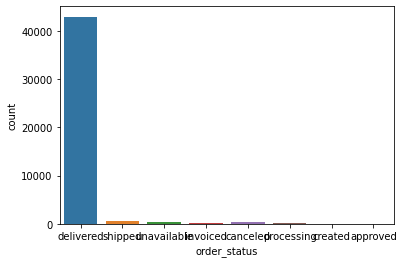

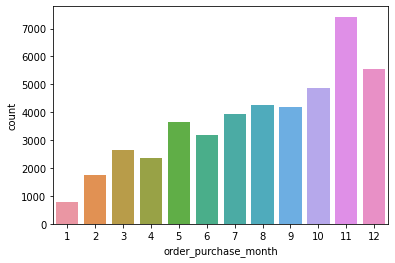

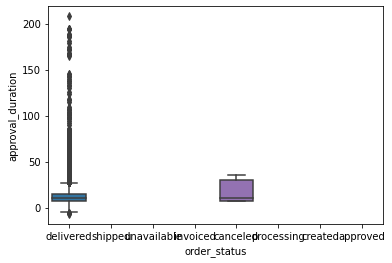

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 기초 통계 정보 제공
print(df_sleep_customer_dataset.describe())

# 2. 결측치 확인
print(df_sleep_customer_dataset.isnull().sum())

# 3. 각 변수별 분포 확인
# order_status 분포 확인
sns.countplot(data=df_sleep_customer_dataset, x='order_status')
plt.show()

# order_purchase_timestamp의 월별 주문량
df_sleep_customer_dataset['order_purchase_timestamp'] = pd.to_datetime(df_sleep_customer_dataset['order_purchase_timestamp'])
df_sleep_customer_dataset['order_purchase_month'] = df_sleep_customer_dataset['order_purchase_timestamp'].dt.month
sns.countplot(data=df_sleep_customer_dataset, x='order_purchase_month')
plt.show()

# 4. 주요 변수 간 관계 확인
# 예: order_status에 따른 order_approved_at와 order_delivered_customer_date의 차이
df_sleep_customer_dataset['order_delivered_customer_date'] = pd.to_datetime(df_sleep_customer_dataset['order_delivered_customer_date'])
df_sleep_customer_dataset['order_approved_at'] = pd.to_datetime(df_sleep_customer_dataset['order_approved_at'])

df_sleep_customer_dataset['approval_duration'] = (df_sleep_customer_dataset['order_delivered_customer_date'] - df_sleep_customer_dataset['order_approved_at']).dt.days
sns.boxplot(data=df_sleep_customer_dataset, x='order_status', y='approval_duration')
plt.show()


       count(distinct order_id)  round(avg(price), 2)
count                 72.000000             72.000000
mean                 617.277778            149.013889
std                 1017.038662            151.298625
min                    1.000000             21.990000
25%                   32.000000             83.002500
50%                  105.500000            121.740000
75%                  714.000000            166.097500
max                 4409.000000           1250.460000
product_category_name_english      1
count(distinct order_id)           0
round(avg(price), 2)               0
round(avg(product_weight_g), 2)    0
round(avg(review_score), 2)        1
dtype: int64


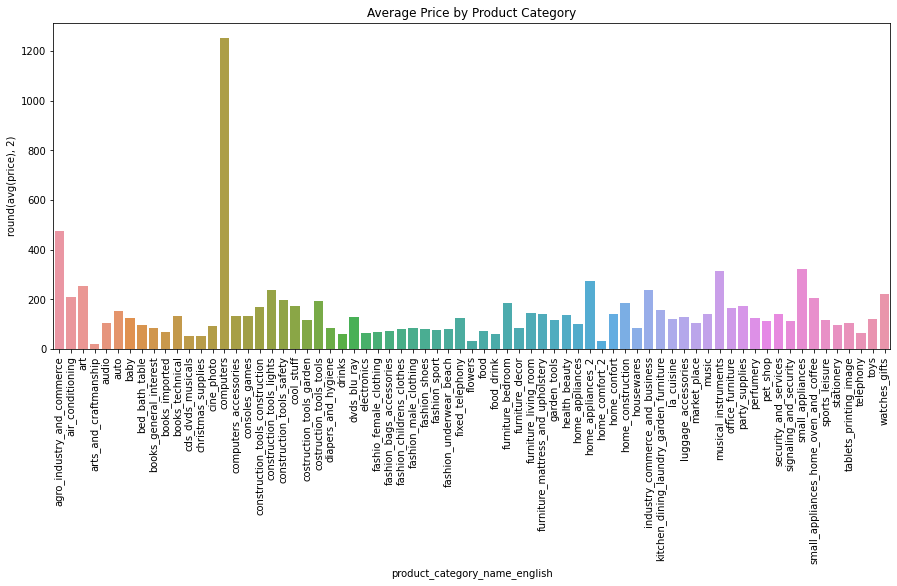

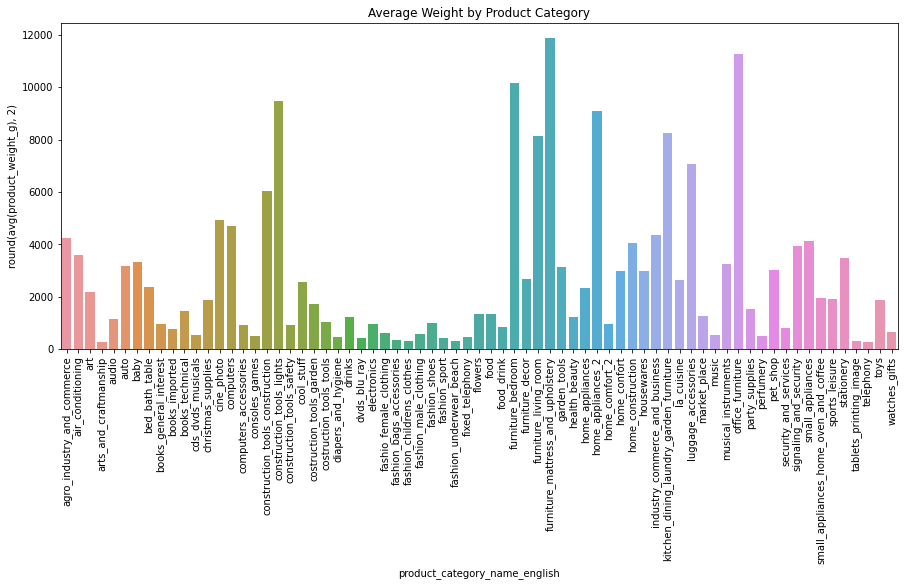

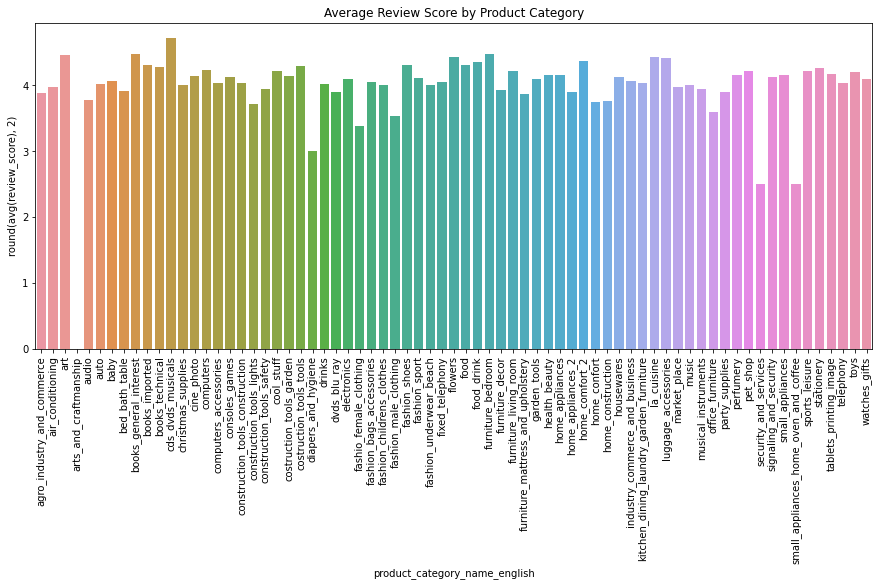

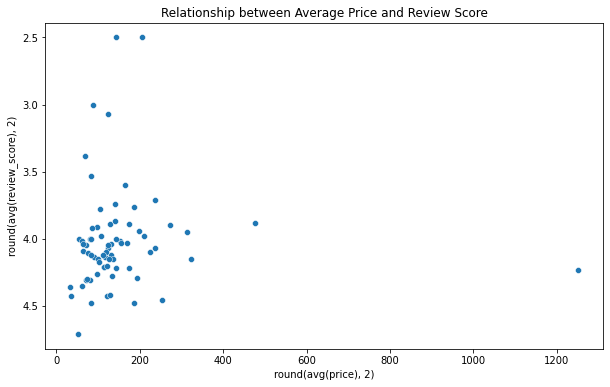

In [19]:

# 1. 기초 통계 정보 제공
print(df_sleep_customer_orders_dataset.describe())

# 2. 결측치 확인
print(df_sleep_customer_orders_dataset.isnull().sum())

# 3. 각 변수별 분포 확인
# 카테고리 별 평균 가격 분포 확인
plt.figure(figsize=(15,6))
sns.barplot(data=df_sleep_customer_orders_dataset, x='product_category_name_english', y='round(avg(price), 2)')
plt.xticks(rotation=90)
plt.title('Average Price by Product Category')
plt.show()

# 카테고리 별 평균 무게 분포 확인
plt.figure(figsize=(15,6))
sns.barplot(data=df_sleep_customer_orders_dataset, x='product_category_name_english', y='round(avg(product_weight_g), 2)')
plt.xticks(rotation=90)
plt.title('Average Weight by Product Category')
plt.show()

# 카테고리 별 평균 리뷰 점수 분포 확인
# Calculate average review scores for each product category
avg_review_scores = df_sleep_customer_orders_dataset.groupby('product_category_name_english')['round(avg(review_score), 2)'].mean().reset_index()

# Plot the results
plt.figure(figsize=(15,6))
sns.barplot(data=avg_review_scores, x='product_category_name_english', y='round(avg(review_score), 2)')
plt.xticks(rotation=90)
plt.title('Average Review Score by Product Category')
plt.show()

# 4. 주요 변수 간 관계 확인
# 예: 평균 가격과 평균 리뷰 점수의 관계
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_sleep_customer_orders_dataset, x='round(avg(price), 2)', y='round(avg(review_score), 2)')
plt.title('Relationship between Average Price and Review Score')
plt.show()



       customer_zip_code_prefix  avg_latitude  avg_longitude
count              46301.000000  46179.000000   46179.000000
mean               36629.747694    -21.014090     -46.152937
std                29835.597475      5.769965       4.164801
min                 1004.000000    -33.689948     -72.668881
25%                12460.000000    -23.581664     -48.185502
50%                26600.000000    -22.899830     -46.627122
75%                62800.000000    -19.937128     -43.465520
max                99990.000000     25.573041     -23.583939
order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
avg_latitude                     122
avg_lon

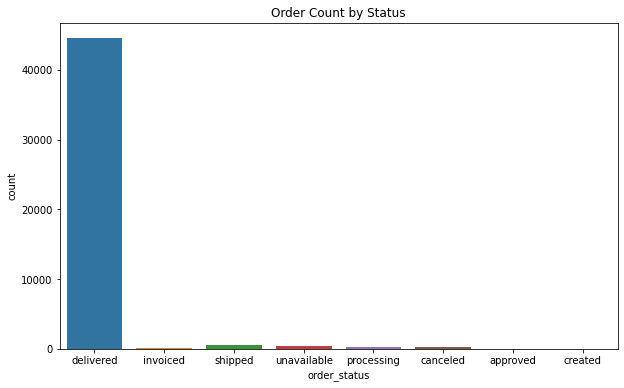

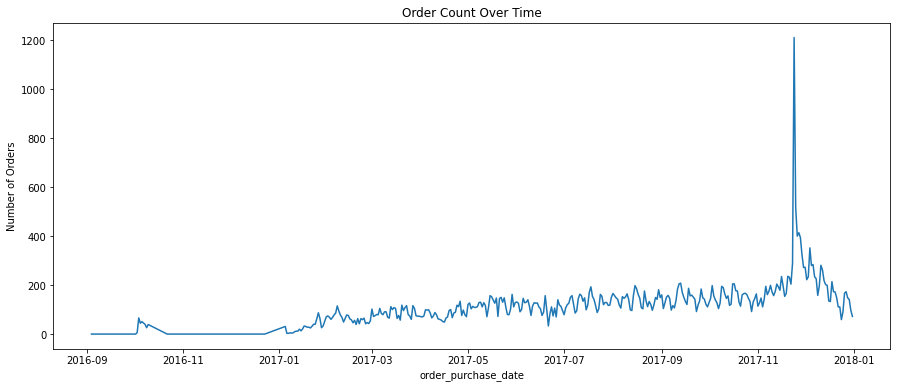

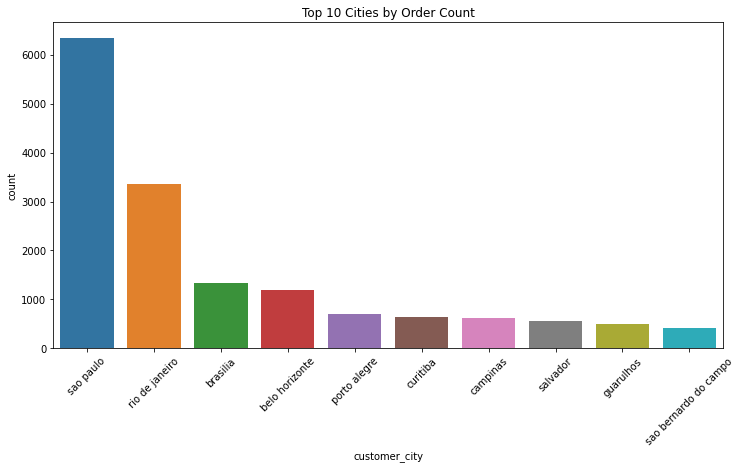

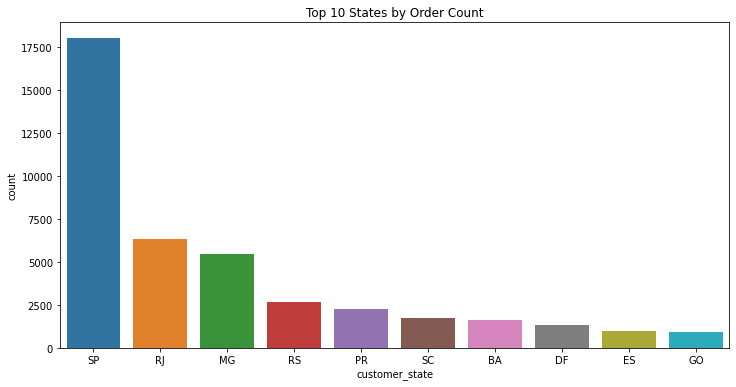

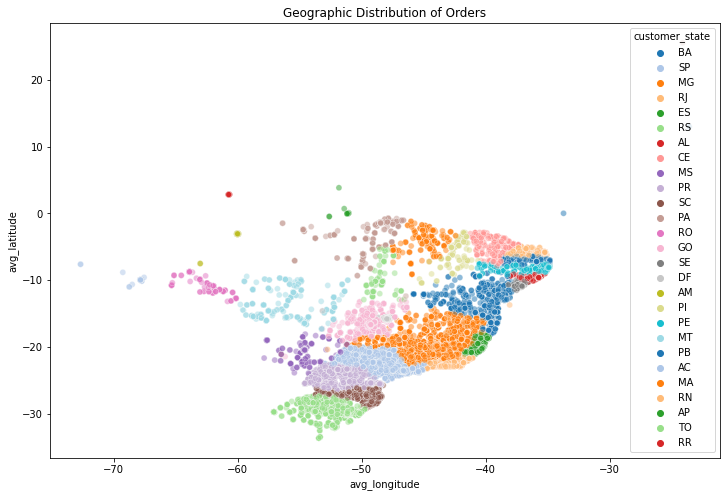

In [20]:

# 1. 기초 통계 정보 제공
print(df_sleep_customer_geo_dataset.describe())

# 2. 결측치 확인
print(df_sleep_customer_geo_dataset.isnull().sum())

# 3. 주문 상태에 따른 주문 수 확인
plt.figure(figsize=(10,6))
sns.countplot(data=df_sleep_customer_geo_dataset, x='order_status')
plt.title('Order Count by Status')
plt.show()

# 4. 시간 경과에 따른 주문 수 확인
df_sleep_customer_geo_dataset['order_purchase_date'] = pd.to_datetime(df_sleep_customer_geo_dataset['order_purchase_timestamp']).dt.date
plt.figure(figsize=(15,6))
df_sleep_customer_geo_dataset.groupby('order_purchase_date').size().plot()
plt.title('Order Count Over Time')
plt.ylabel('Number of Orders')
plt.show()

# 5. 주요 도시 및 주별 주문 수 확인
top_cities = df_sleep_customer_geo_dataset['customer_city'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.countplot(data=df_sleep_customer_geo_dataset[df_sleep_customer_geo_dataset['customer_city'].isin(top_cities)], x='customer_city', order=top_cities)
plt.title('Top 10 Cities by Order Count')
plt.xticks(rotation=45)
plt.show()

top_states = df_sleep_customer_geo_dataset['customer_state'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.countplot(data=df_sleep_customer_geo_dataset, x='customer_state', order=top_states)
plt.title('Top 10 States by Order Count')
plt.show()

# 6. 평균 위도 및 경도를 사용한 지리적 분포 확인
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_sleep_customer_geo_dataset, x='avg_longitude', y='avg_latitude', hue='customer_state', palette='tab20', alpha=0.5)
plt.title('Geographic Distribution of Orders')
plt.show()


       product_category_name_english                customer_unique_id  \
count                           2416                              2452   
unique                            54                              1193   
top                   bed_bath_table  12f5d6e1cbf93dafd9dcc19095df0b3d   
freq                             393                                 6   

                             customer_id order_purchase_timestamp  
count                               2452                     2452  
unique                              2452                     2304  
top     102fc0966044243157bb81e4ee0a251e      2017-04-02 16:33:30  
freq                                   1                        2  
product_category_name_english    36
customer_unique_id                0
customer_id                       0
order_purchase_timestamp          0
dtype: int64


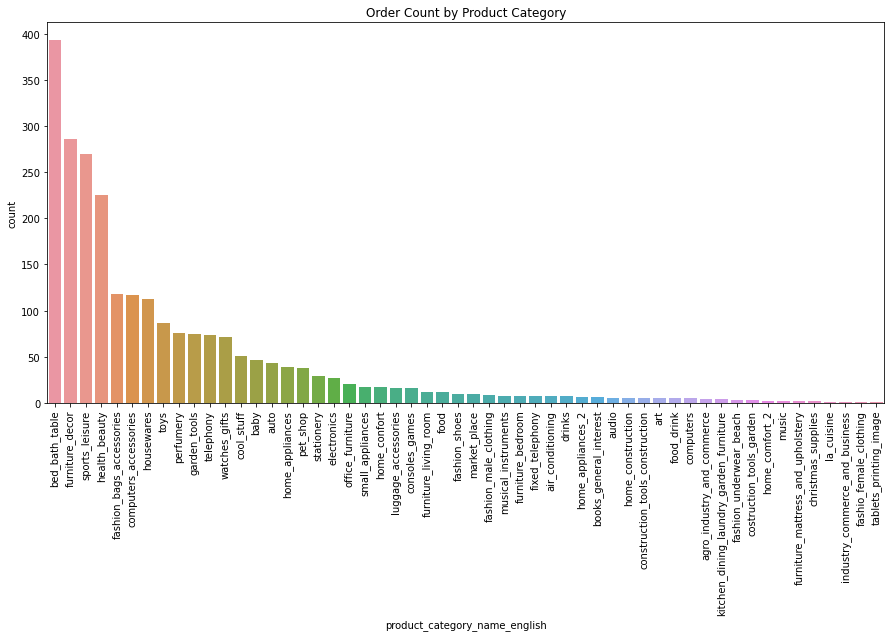

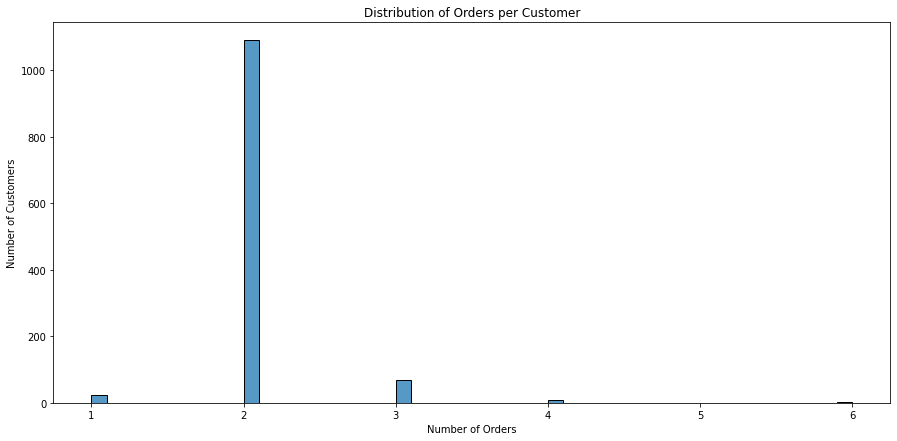

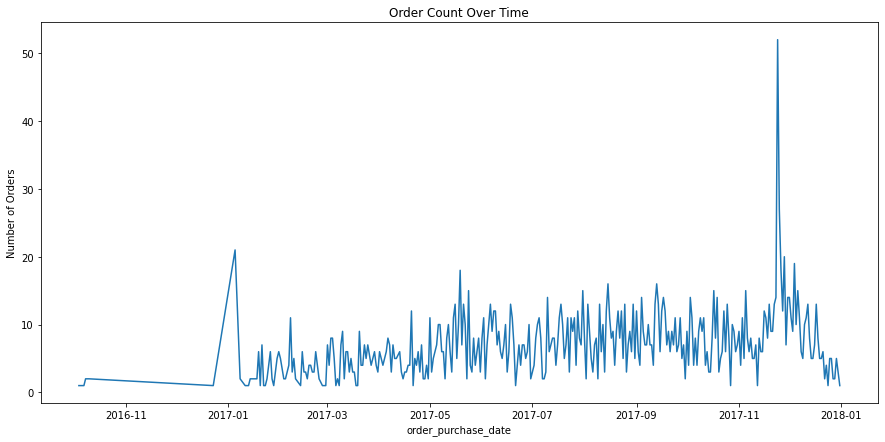

In [21]:

# 1. 기초 통계 정보 제공
print(df_sleep_customer_many_what_purchased_dataset.describe(include='all'))

# 2. 결측치 확인
print(df_sleep_customer_many_what_purchased_dataset.isnull().sum())

# 3. 상품 카테고리별 주문 수 확인
plt.figure(figsize=(15,7))
sns.countplot(data=df_sleep_customer_many_what_purchased_dataset, x='product_category_name_english', order=df_sleep_customer_many_what_purchased_dataset['product_category_name_english'].value_counts().index)
plt.title('Order Count by Product Category')
plt.xticks(rotation=90)
plt.show()

# 4. 고객별 주문 수 확인
customer_order_counts = df_sleep_customer_many_what_purchased_dataset['customer_unique_id'].value_counts()
plt.figure(figsize=(15,7))
sns.histplot(customer_order_counts, bins=50)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

# 5. 시간 경과에 따른 주문 수 확인
df_sleep_customer_many_what_purchased_dataset['order_purchase_date'] = pd.to_datetime(df_sleep_customer_many_what_purchased_dataset['order_purchase_timestamp']).dt.date
plt.figure(figsize=(15,7))
df_sleep_customer_many_what_purchased_dataset.groupby('order_purchase_date').size().plot()
plt.title('Order Count Over Time')
plt.ylabel('Number of Orders')
plt.show()


                      customer_unique_id                          order_id  \
count                              47026                             47025   
unique                             43347                             44638   
top     9a736b248f67d166d2fbb006bcb877c3  fa65dad1b0e818e3ccc5cb0e39231352   
freq                                  33                                29   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        payment_sequential payment_type  payment_installments  

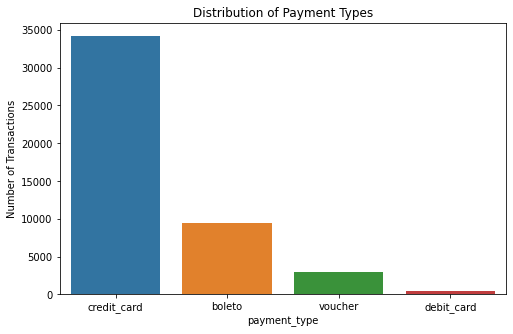

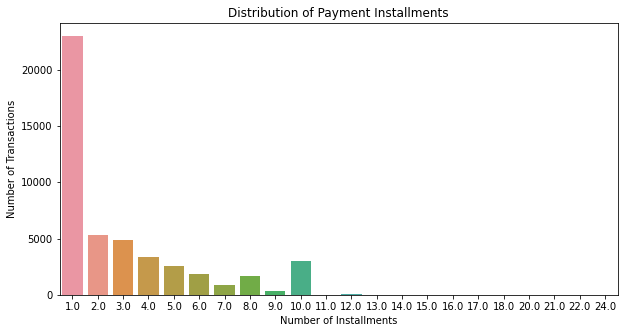

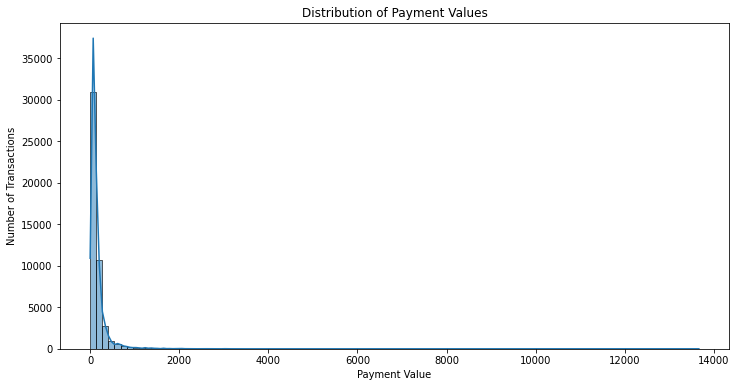

In [22]:

# 1. 기초 통계 정보 제공
print(df_sleep_customer_payments_dataset.describe(include='all'))

# 2. 결측치 확인
print(df_sleep_customer_payments_dataset.isnull().sum())

# 3. 결제 유형별 분포 확인
plt.figure(figsize=(8,5))
sns.countplot(data=df_sleep_customer_payments_dataset, x='payment_type')
plt.title('Distribution of Payment Types')
plt.ylabel('Number of Transactions')
plt.show()

# 4. 할부 개월 수별 분포 확인
plt.figure(figsize=(10,5))
sns.countplot(data=df_sleep_customer_payments_dataset, x='payment_installments')
plt.title('Distribution of Payment Installments')
plt.ylabel('Number of Transactions')
plt.xlabel('Number of Installments')
plt.show()

# 5. 결제 금액의 분포 확인
plt.figure(figsize=(12,6))
sns.histplot(df_sleep_customer_payments_dataset['payment_value'], bins=100, kde=True)
plt.title('Distribution of Payment Values')
plt.xlabel('Payment Value')
plt.ylabel('Number of Transactions')
plt.show()
